In [89]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

# Is there a global warming?
### Let's read the data from the "GlobalTemperatures.csv" file, which has a monthly Earth’s temperature and plot it on the chart.

In [90]:
global_temp=pd.read_csv('GlobalTemperatures.csv')

In [91]:
global_temp.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


#### extract only year

In [92]:
global_temp['dt'][0].split('-')[0]

'1750'

In [93]:
def fetch_year(date):
    return date.split('-')[0]

In [94]:
global_temp['years']=global_temp['dt'].apply(fetch_year)

In [95]:
global_temp.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,years
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN,1750
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN,1750
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN,1750
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN,1750
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN,1750


In [96]:
data=global_temp.groupby('years').agg({'LandAverageTemperature':'mean','LandAverageTemperatureUncertainty':'mean'}).reset_index()

In [97]:
data

,years,LandAverageTemperature,LandAverageTemperatureUncertainty
0,1750,8.719364,2.637818
1,1751,7.976143,2.781143
2,1752,5.779833,2.977000
3,1753,8.388083,3.176000
4,1754,8.469333,3.494250
...,...,...,...
261,2011,9.516000,0.082000
262,2012,9.507333,0.083417
263,2013,9.606500,0.097667
264,2014,9.570667,0.090167


In [98]:
data['Uncertainity_top']=data['LandAverageTemperature'] + data['LandAverageTemperatureUncertainty']
data['Uncertainity_bottom']=data['LandAverageTemperature'] - data['LandAverageTemperatureUncertainty']

In [99]:
data.head()

,years,LandAverageTemperature,LandAverageTemperatureUncertainty,Uncertainity_top,Uncertainity_bottom
0,1750,8.719364,2.637818,11.357182,6.081545
1,1751,7.976143,2.781143,10.757286,5.195000
2,1752,5.779833,2.977000,8.756833,2.802833
3,1753,8.388083,3.176000,11.564083,5.212083
4,1754,8.469333,3.494250,11.963583,4.975083


In [100]:
fig=px.line(data,x='years',y=['LandAverageTemperature','Uncertainity_top', 'Uncertainity_bottom'],title='Avg Land Temp in World')
fig.show()

From the charts you can see, that there is global warming nowadays. The average temperature of Earth surface has the highest value in the last three centuries. 

### Analyse Average temperature in each season

In [101]:
global_temp.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,years
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN,1750
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN,1750
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN,1750
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN,1750
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN,1750


In [102]:
global_temp.dtypes

dt                                            object
LandAverageTemperature                       float64
LandAverageTemperatureUncertainty            float64
LandMaxTemperature                           float64
LandMaxTemperatureUncertainty                float64
LandMinTemperature                           float64
LandMinTemperatureUncertainty                float64
LandAndOceanAverageTemperature               float64
LandAndOceanAverageTemperatureUncertainty    float64
years                                         object
dtype: object

In [103]:
global_temp['dt']=pd.to_datetime(global_temp['dt'])

In [104]:
global_temp.dtypes

dt                                           datetime64[ns]
LandAverageTemperature                              float64
LandAverageTemperatureUncertainty                   float64
LandMaxTemperature                                  float64
LandMaxTemperatureUncertainty                       float64
LandMinTemperature                                  float64
LandMinTemperatureUncertainty                       float64
LandAndOceanAverageTemperature                      float64
LandAndOceanAverageTemperatureUncertainty           float64
years                                                object
dtype: object

In [105]:
global_temp['month']=global_temp['dt'].dt.month

In [106]:
global_temp.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,years,month
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN,1750,1
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN,1750,2
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN,1750,3
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN,1750,4
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN,1750,5


#### ADD season column

In [107]:
def get_season(month):
    if month>=3 and month<=5:
        return 'spring'
    elif month>=6 and month<=8:
        return 'summer'
    elif month>=9 and month<=11:
        return 'autumn'
    else:
        return 'winter'

In [108]:
global_temp['season']=global_temp['month'].apply(get_season)

In [109]:
global_temp.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,years,month,season
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN,1750,1,winter
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN,1750,2,winter
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN,1750,3,spring
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN,1750,4,spring
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN,1750,5,spring


In [110]:
years=global_temp['years'].unique()

In [111]:
spring_temps=[]
summer_temps=[]
autumn_temps=[]
winter_temps=[]

In [112]:
for year in years:
    current_df=global_temp[global_temp['years']==year]
    spring_temps.append(current_df[current_df['season']=='spring']['LandAverageTemperature'].mean())
    summer_temps.append(current_df[current_df['season']=='summer']['LandAverageTemperature'].mean())
    autumn_temps.append(current_df[current_df['season']=='autumn']['LandAverageTemperature'].mean())
    winter_temps.append(current_df[current_df['season']=='winter']['LandAverageTemperature'].mean())

In [113]:
season=pd.DataFrame()

In [114]:
season['year']=years
season['spring_temps']=spring_temps
season['summer_temps']=summer_temps
season['autumn_temps']=autumn_temps
season['winter_temps']=winter_temps

In [115]:
season.head()

,year,spring_temps,summer_temps,autumn_temps,winter_temps
0,1750,8.563000,14.518333,8.890000,2.963000
1,1751,6.735000,14.116000,10.673000,1.729000
2,1752,7.035500,NaN,7.587000,2.717000
3,1753,8.627333,14.608333,9.212333,1.104333
4,1754,9.074333,14.208333,8.957333,1.637333


In [116]:
season.columns

Index(['year', 'spring_temps', 'summer_temps', 'autumn_temps', 'winter_temps'], dtype='object')

In [117]:
fig=px.line(season,x='year',y=['spring_temps', 'summer_temps', 'autumn_temps', 'winter_temps'],title='Avg Temp in Each Season')
fig.show()

As you see temperature is gradually increasing

## Lets Build a Time Series Model

In [118]:
cities=pd.read_csv('GlobalLandTemperaturesByCity.csv')

In [119]:
cities.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [120]:
cities.shape

(8599212, 7)

#### filter dataframe where country is United states

In [121]:
usa=cities[cities['Country']=='United States']

In [122]:
usa.shape

(687289, 7)

In [123]:
data=['New York','Los Angeles','San Francisco']

In [124]:
data2=usa[usa['City'].isin(data)]

In [125]:
data2.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
4356748,1849-01-01,8.819,2.558,Los Angeles,United States,34.56N,118.70W
4356749,1849-02-01,9.577,1.970,Los Angeles,United States,34.56N,118.70W
4356750,1849-03-01,11.814,2.173,Los Angeles,United States,34.56N,118.70W
4356751,1849-04-01,13.704,2.902,Los Angeles,United States,34.56N,118.70W
4356752,1849-05-01,14.834,2.017,Los Angeles,United States,34.56N,118.70W


In [126]:
data2=data2[['dt','AverageTemperature']]

In [127]:
data2.head()

,dt,AverageTemperature
4356748,1849-01-01,8.819
4356749,1849-02-01,9.577
4356750,1849-03-01,11.814
4356751,1849-04-01,13.704
4356752,1849-05-01,14.834


In [128]:
data2.columns=['Date','Temp']

In [129]:
data2.head()

,Date,Temp
4356748,1849-01-01,8.819
4356749,1849-02-01,9.577
4356750,1849-03-01,11.814
4356751,1849-04-01,13.704
4356752,1849-05-01,14.834


In [130]:
data2.dtypes

Date     object
Temp    float64
dtype: object

In [131]:
data2['Date']=pd.to_datetime(data2['Date'])

In [132]:
data2.isna().sum()

Date      0
Temp    120
dtype: int64

In [133]:
data2.dropna(inplace=True)

In [134]:
data2.shape

(7073, 2)

In [135]:
### note: for Machine Learning,feature is a columns & we have by-default index as from 0 but for our time series Problem,we have date column our as row-index
data2.set_index('Date',inplace=True)

In [136]:
data2.head()

,Temp
Date,
1849-01-01,8.819
1849-02-01,9.577
1849-03-01,11.814
1849-04-01,13.704
1849-05-01,14.834


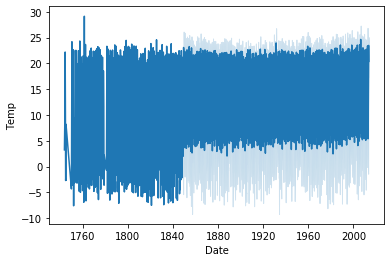

In [137]:
sns.lineplot(x=data2.index,y=data2['Temp'])

### lets find data is stationery or not

In [138]:
from statsmodels.tsa.stattools import adfuller

In [139]:
#apply adfuller on data2['Temp']
test_result=adfuller(data2['Temp'])

## if Pvalue<0.05 ,we reject Null hypo ie alternate hypo is true,ie data is non stationery

## Ho: ie null hypothesis is stationary
## H1: ie Alternate Hypothesis ,It is not stationary


In [140]:
def adfuller_test(Temp):
    result=adfuller(Temp)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [141]:
adfuller_test(data2['Temp'])

ADF Test Statistic : -2.006389303675747
p-value : 0.28377865833334703
#Lags Used : 35
Number of Observations Used : 7037
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [142]:
df=data2.copy()

In [143]:
df['first_temp_diff']=df['Temp']-df['Temp'].shift(12)

In [144]:
df.head(20)

,Temp,first_temp_diff
Date,,
1849-01-01,8.819,NaN
1849-02-01,9.577,NaN
1849-03-01,11.814,NaN
1849-04-01,13.704,NaN
1849-05-01,14.834,NaN
1849-06-01,21.173,NaN
1849-07-01,26.159,NaN
1849-08-01,26.099,NaN
1849-09-01,21.848,NaN


In [145]:
adfuller_test(df['first_temp_diff'].dropna())

ADF Test Statistic : -21.239650404910886
p-value : 0.0
#Lags Used : 35
Number of Observations Used : 7025
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


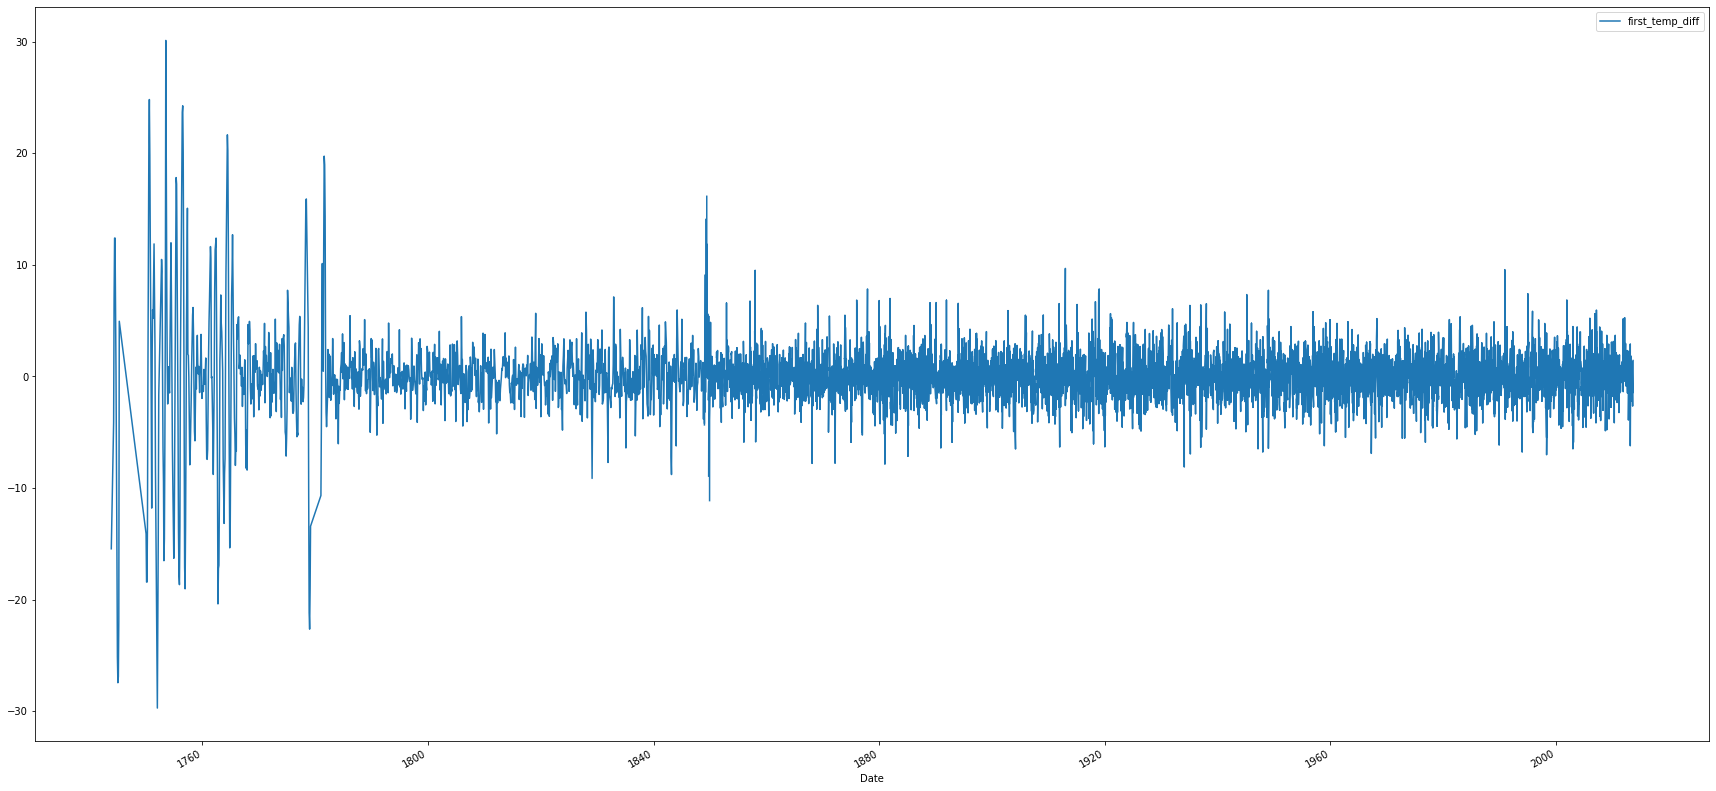

In [146]:
df[['first_temp_diff']].plot(figsize=(30,15))

### Examine whether there is a seasonality factor in your data or not

In [147]:
data2.head()

,Temp
Date,
1849-01-01,8.819
1849-02-01,9.577
1849-03-01,11.814
1849-04-01,13.704
1849-05-01,14.834


In [148]:
data2['month']=data2.index.month

In [149]:
data2['year']=data2.index.year

In [150]:
data2.head()

,Temp,month,year
Date,,,
1849-01-01,8.819,1,1849
1849-02-01,9.577,2,1849
1849-03-01,11.814,3,1849
1849-04-01,13.704,4,1849
1849-05-01,14.834,5,1849


In [151]:
pivot=data2.pivot_table(values='Temp',index='month',columns='year')

In [152]:
pivot

year,1743,1744,1745,1750,1751,1752,1753,1754,1755,1756,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
month,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,-2.363,-4.310,-3.591,-7.588,-3.122,-2.252,-3.193,-1.985,...,4.080333,4.923000,7.135333,5.656000,5.216333,5.550333,5.776667,5.109333,7.177667,5.388333
2,NaN,NaN,-2.671,-2.719,-2.051,NaN,-1.467,-2.583,-1.802,0.259,...,6.100000,7.297000,7.547667,5.634000,6.754333,6.540667,6.788000,5.777333,7.970000,6.222667
3,NaN,NaN,1.363,2.773,3.256,3.322,4.207,2.728,1.112,NaN,...,12.184000,9.124667,7.527333,10.586000,9.733667,9.211000,10.486667,9.115000,10.604333,10.162333
4,NaN,9.788,8.209,8.848,7.992,7.402,8.099,NaN,8.714,NaN,...,13.806333,12.546000,12.051667,12.342000,13.113000,12.744000,12.254000,12.710000,13.075000,13.880000
5,NaN,15.708,NaN,15.411,NaN,NaN,15.330,NaN,15.238,NaN,...,17.817333,15.982333,17.123333,17.150000,15.800333,17.565667,15.856333,15.724000,17.670333,17.335333
6,NaN,21.210,NaN,19.017,20.724,NaN,20.820,20.075,19.964,20.488,...,19.872000,19.775333,21.395333,20.514333,21.474667,18.941667,20.436667,19.305000,19.904333,21.028333
7,NaN,22.207,NaN,24.203,22.668,NaN,22.524,22.503,NaN,22.452,...,22.246333,23.611667,24.655333,22.628333,23.020000,22.247667,22.538667,22.733333,22.654000,23.489667
8,NaN,NaN,NaN,22.135,21.547,NaN,21.324,21.461,NaN,21.208,...,22.101333,23.028333,21.920333,22.690000,22.305333,22.578000,21.665333,22.028667,23.384667,21.654667
9,NaN,14.922,NaN,17.445,15.812,NaN,15.548,16.281,16.137,17.345,...,20.669333,19.427667,19.365333,19.559000,20.686667,20.752667,20.537333,20.856333,20.655667,20.393333


Text(0, 0.5, 'Temperatures')

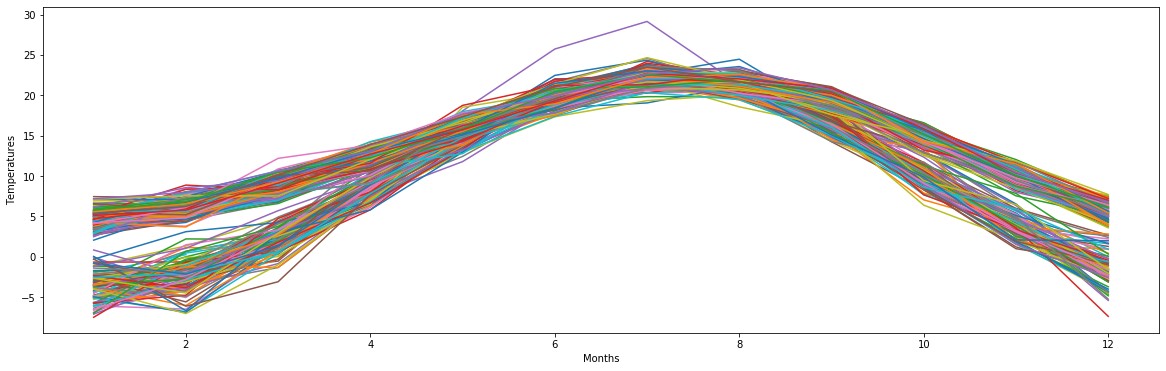

In [153]:
pivot.plot(figsize=(20,6))
plt.legend().remove()
plt.xlabel('Months')
plt.ylabel('Temperatures')

looking this graph,we can say this data is seasonal The series clearly has some seasonality, the higher temperatures are around b/w June & August and the lower are between December & Feb so thats basically a observation that u can drawn and represent to ur client

In [154]:
monthly_seasonality=pivot.mean(axis=1)

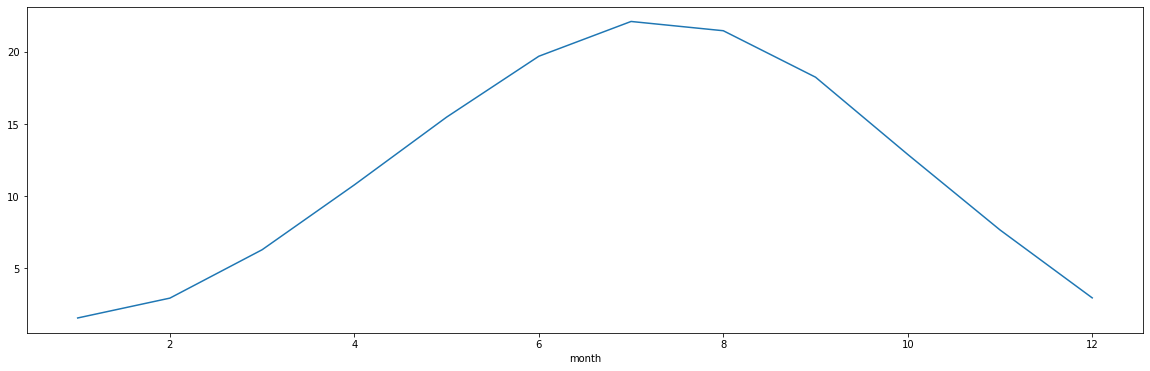

In [155]:
monthly_seasonality.plot(figsize=(20,6))

In [156]:
df.head()

,Temp,first_temp_diff
Date,,
1849-01-01,8.819,NaN
1849-02-01,9.577,NaN
1849-03-01,11.814,NaN
1849-04-01,13.704,NaN
1849-05-01,14.834,NaN


In [157]:
df=df[['first_temp_diff']]

In [158]:
df.head()

,first_temp_diff
Date,
1849-01-01,NaN
1849-02-01,NaN
1849-03-01,NaN
1849-04-01,NaN
1849-05-01,NaN


In [159]:
df.dropna(inplace=True)

In [160]:
df.head()

,first_temp_diff
Date,
1850-01-01,-1.732
1850-02-01,-1.002
1850-03-01,-1.449
1850-04-01,0.031
1850-05-01,1.799


In [161]:
### smoothening your Time Series data

### Moving average of window 5

In [162]:
df['first_temp_diff'].rolling(window=5).mean()

Date
1850-01-01       NaN
1850-02-01       NaN
1850-03-01       NaN
1850-04-01       NaN
1850-05-01   -0.4706
               ...  
2013-05-01    0.4336
2013-06-01    1.0236
2013-07-01    1.4060
2013-08-01    0.8454
2013-09-01    0.7614
Name: first_temp_diff, Length: 7061, dtype: float64

In [163]:
value=pd.DataFrame(df['first_temp_diff'])

In [164]:
temp_df=pd.concat([value,df['first_temp_diff'].rolling(window=5).mean()],axis=1)

In [165]:
temp_df.columns=['actual_temp','forecast_temp']

In [166]:
temp_df.head(20)

,actual_temp,forecast_temp
Date,,
1850-01-01,-1.732,NaN
1850-02-01,-1.002,NaN
1850-03-01,-1.449,NaN
1850-04-01,0.031,NaN
1850-05-01,1.799,-0.4706
1850-06-01,-0.932,-0.3106
1850-07-01,-2.714,-0.6530
1850-08-01,-0.164,-0.3960
1850-09-01,0.714,-0.2594


In [167]:
from sklearn.metrics import mean_squared_error

In [168]:
### then check accuracy
np.sqrt(mean_squared_error(temp_df['forecast_temp'][4:],temp_df['actual_temp'][4:]))

2.3934235122562058

# Lets Implement ARIMA

In [169]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [170]:
df.head()

,first_temp_diff
Date,
1850-01-01,-1.732
1850-02-01,-1.002
1850-03-01,-1.449
1850-04-01,0.031
1850-05-01,1.799


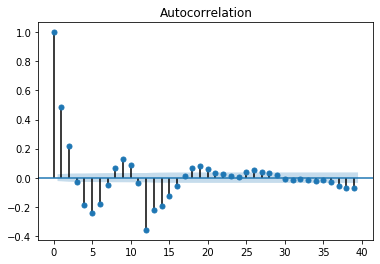

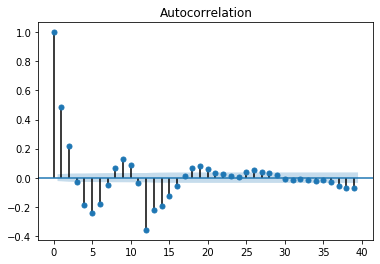

In [171]:
plot_acf(df['first_temp_diff'].dropna())

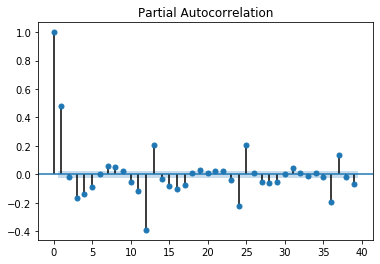

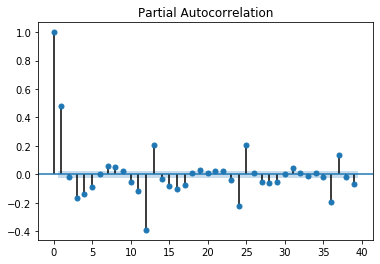

In [172]:
plot_pacf(df['first_temp_diff'].dropna())

In [173]:
df.isna().sum()

first_temp_diff    0
dtype: int64

In [174]:
df.shape

(7061, 1)

In [175]:
training_data=df[0:6000]
### create test that is basically unseen to our model, or which is basocally is used for evalaution
test_data=df[6000:]

In [176]:
from statsmodels.tsa.arima_model import ARIMA

In [177]:
arima=ARIMA(training_data,order=(2,1,3))

In [178]:
model=arima.fit()

In [179]:
predictions=model.forecast(steps=len(test_data))[0]

In [180]:
np.sqrt(mean_squared_error(test_data,predictions))

1.5120587526401874

#### model Tuning or Hyperparameter Tuning or choosing the best pair of (p,d,q

In [181]:
p_values=range(0,4)
q_values=range(0,4)
d_values=range(0,3)

In [ ]:
for p in p_values:
    for d in d_values:
        for q in q_values:
            order=(p,d,q)
            train=df[0:6000]
            test=df[6000:]
            predictions=[]
            for i in range(len(test)):
                try:
                    arima=ARIMA(train,order)
                    model=arima.fit(disp=0)
                    pred=model.forecast()[0]
                    predictions.append(pred)
                    error=mean_squared_error(test,predictions)
                    print('MSE is {} with order {}'.format(error,order))
                except:
                    continue

MSE is 2.283672928384571 with order (0, 0, 0)
MSE is 2.522758527165038 with order (0, 0, 1)
MSE is 2.295371237290374 with order (0, 0, 2)
MSE is 2.3855390848005182 with order (0, 0, 3)
MSE is 2.6894115719830562 with order (0, 1, 0)
MSE is 2.393995712532922 with order (0, 1, 1)
